In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [312]:
%run ./seasonality_functions.ipynb

## Seasonality embeddings by product category

In [234]:
#set column to find market share of 
columnb='product_type_name'

# uncomment the next line for viewing only top categories
# category_performance_per_month=market_share_per_month(column=columnb,number_top_categories=20)

# fucntion gives performance compared with average monthly market share
category_performance_per_month=market_share_per_month(column=columnb)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='t_dat')


In [235]:
category_performance_per_month.shape

(20, 12)

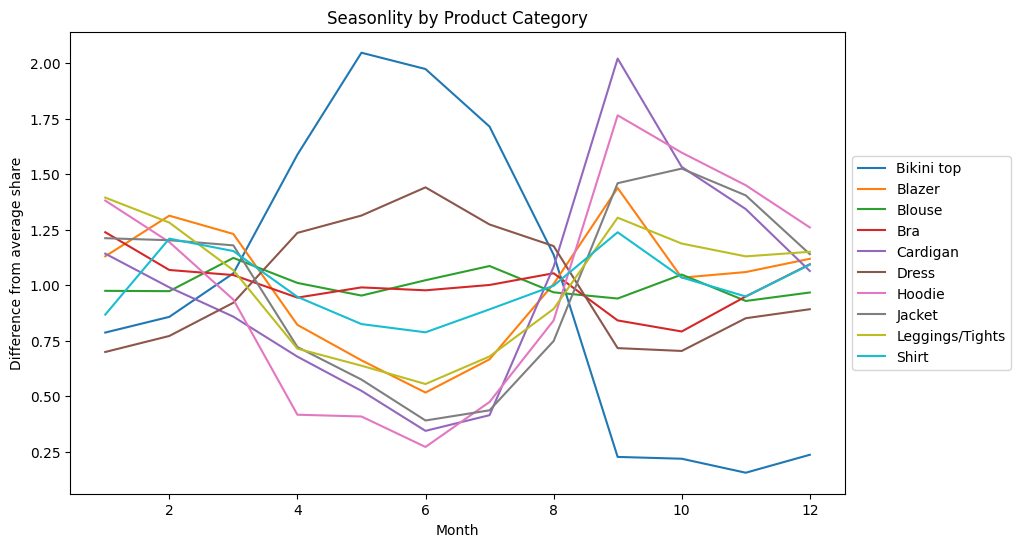

In [236]:
# Plot the graph
ax = category_performance_per_month.head(10).T.plot(kind='line', figsize=(10,6))

# Set the title and axis labels
ax.set_title('Seasonlity by Product Category')
ax.set_xlabel('Month')
ax.set_ylabel('Difference from average share')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the graph
plt.show()

In [233]:
path='kaggle_data/'
category_season_embedding=category_performance_per_month.reset_index()
category_season_embedding.to_csv(os.path.join(path,r'cat_sea_embedding.csv'),index=False)


## Seasonality embeddings by Color

In [322]:
#set column
column='perceived_colour_master_name'

#set smaller categories to 'Other'
categories_to_combine=['Unknown','undefined','Yellowish Green','Bluish Green']

# color_performance_per_month=market_share_per_month(column, number_top_categories=10,categories_to_combine=categories_to_combine)

color_performance_per_month=market_share_per_month(column,categories_to_combine=categories_to_combine)

In [321]:
color_performance_per_month.reset_index()

,perceived_colour_master_name,1,2,3,4,5,6,7,8,9,10,11,12
0,Beige,1.026325,1.052592,1.031787,1.029979,1.086294,1.090687,1.001545,1.108967,1.086834,0.848477,0.820697,0.815816
1,Black,1.090194,1.028042,0.968620,0.888590,0.864817,0.857609,0.881715,0.963733,1.054509,1.071473,1.156778,1.173920
2,Blue,0.960614,1.060820,1.107670,1.131199,1.059235,1.070834,1.102638,0.985012,0.875453,0.970981,0.830045,0.845498
3,Green,0.928088,1.001845,1.020573,1.192583,1.163403,1.025323,0.805222,0.807987,0.976044,1.065458,1.116200,0.897274
4,Grey,1.287753,0.980154,0.826610,0.715680,0.610583,0.578735,0.660405,0.820199,1.302308,1.382876,1.465863,1.368835
5,Khaki green,0.805631,1.168982,1.217984,1.305427,1.228549,1.266747,1.050863,0.994535,0.805965,0.850626,0.676307,0.628384
6,Pink,1.105716,1.128056,1.099395,1.022869,1.053371,1.054148,1.129827,1.101987,0.903333,0.859106,0.725852,0.816340
7,Red,1.058139,0.912593,0.957477,0.866051,0.886573,0.766512,0.723075,0.648209,0.832338,1.246883,1.606404,1.495746
8,White,0.756042,0.885715,1.030211,1.250075,1.311785,1.371529,1.359813,1.183754,0.837338,0.718775,0.628635,0.666328
9,Yellow,0.834781,0.917391,1.054899,1.271460,1.333276,1.372117,1.254052,0.978906,0.782080,0.895348,0.678570,0.627119


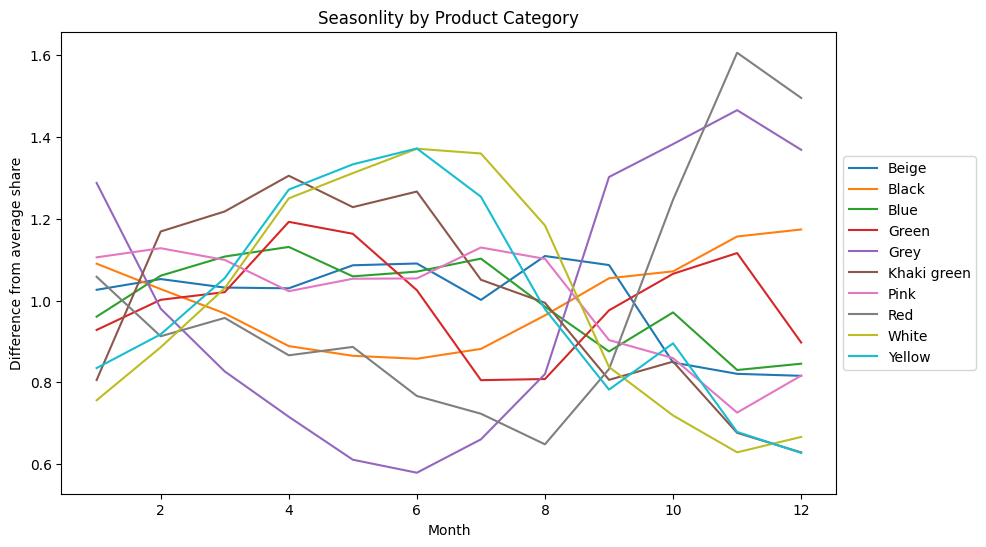

In [309]:
# Plot the graph
ax = color_performance_per_month.head(10).T.plot(kind='line', figsize=(10,6))

# Set the title and axis labels
ax.set_title('Seasonlity by Product Category')
ax.set_xlabel('Month')
ax.set_ylabel('Difference from average share')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the graph
plt.show()

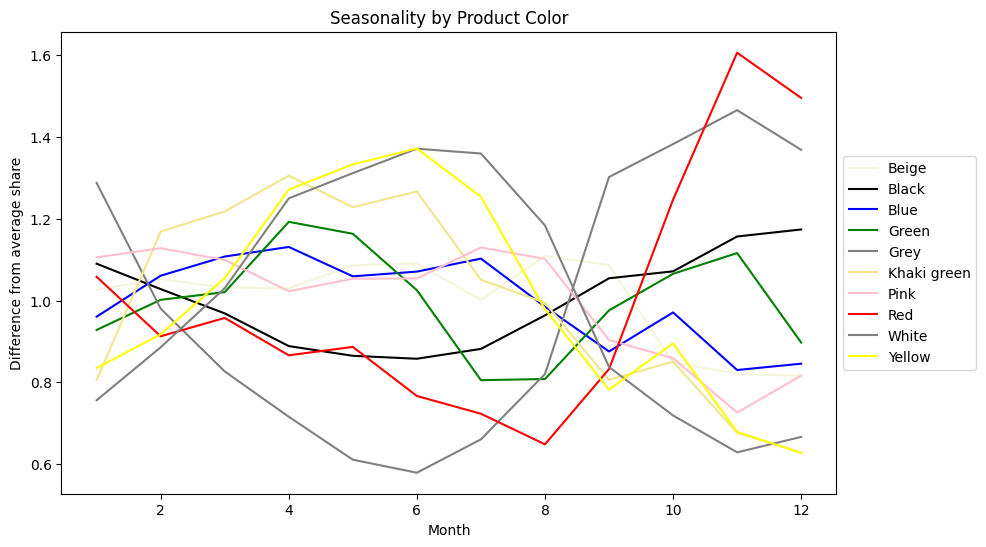

In [320]:
color_map = {'Beige': 'beige', 'Black': 'black', 'Blue': 'blue', 'Green': 'green', 'Grey': 'grey', 'Khaki green': 'khaki', 'Pink': 'pink', 'Red': 'red', 'White': 'white', 'Yellow': 'yellow'}
rgb_map = {'beige': (245/255, 245/255, 220/255), 'black': (0, 0, 0), 'blue': (0, 0, 1), 'green': (0, 0.5, 0), 'grey': (0.5, 0.5, 0.5), 'khaki': (240/255, 230/255, 140/255), 'pink': (1, 0.75, 0.8), 'red': (1, 0, 0), 'white': (0.5, 0.5, 0.5), 'yellow': (1, 1, 0)}
color_performance_per_month_copy=color_performance_per_month.copy().reset_index()
# Create the line plot
ax = color_performance_per_month_copy.set_index('perceived_colour_master_name').T.plot(figsize=(10, 6), color=[rgb_map[color_map[c]] for c in color_performance_per_month_copy['perceived_colour_master_name']])

# Set the title and axis labels
ax.set_title('Seasonality by Product Color')
ax.set_xlabel('Month')
ax.set_ylabel('Difference from average share')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the plot
plt.show()

In [323]:
path='kaggle_data/'
color_season_embedding=color_performance_per_month.reset_index()

color_season_embedding.to_csv(os.path.join(path,r'col_sea_embedding.csv'),index=False)
